In [1]:
import pandas as pd 
import sqlalchemy
server = 'ITT-KASHISH-S'       # e.g., 'localhost\SQLEXPRESS
database = 'NYC_Airbnb_2019'   # e.g., 'AirbnbDB
driver = 'ODBC Driver 17 for SQL Server'
# Build the connection string using trusted_connection
conn_str = f"mssql+pyodbc://@{server}/{database}?driver={driver}&trusted_connection=yes"
engine = sqlalchemy.create_engine(conn_str)
df_listings = pd.read_sql("SELECT * FROM cleaned_nyc_airbnb", engine)
df_reviews = pd.read_sql("SELECT * FROM reviews", engine)
df_neighbourhoods = pd.read_sql("SELECT * FROM neighbourhoods", engine)
print(df_neighbourhoods.head())
print(df_listings.head())
print(df_reviews.head())


  neighbourhood_group neighbourhood
0               Bronx      Allerton
1               Bronx    Baychester
2               Bronx       Belmont
3               Bronx     Bronxdale
4               Bronx   Castle Hill
   listing_id                                       listing_name  host_id  \
0        2539   Superfast Wi-Fi.  Clean & quiet home by the park     2787   
1        2595           Skylit Midtown Manhattan Spacious Studio     2845   
2        5136    Spacious Family Friendly Duplex w/ Patio + Yard     7378   
3        6848                   Only 2 stops to Manhattan studio    15991   
4        6872  Uptown Sanctuary w/ Private Bath (Month to Month)    16104   

   host_name neighbourhood_group neighbourhood  latitude  longitude  \
0       John            Brooklyn    Kensington  40.64529  -73.97238   
1   Jennifer           Manhattan       Midtown  40.75356  -73.98559   
2    Rebecca            Brooklyn   Sunset Park  40.66265  -73.99454   
3      Allen            Brooklyn  Wil

In [2]:
print(df_listings.isnull().sum())

listing_id                 0
listing_name               0
host_id                    0
host_name                 15
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                  14863
minimum_nights             0
number_of_reviews          0
reviews_per_month      11151
availability_365           0
last_review            11151
review_score           11151
host_listing_count         0
dtype: int64


In [3]:
df_listings = df_listings.dropna(subset=['price'])
print(df_listings.isnull().sum())

listing_id                0
listing_name              0
host_id                   0
host_name                 5
neighbourhood_group       0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
number_of_reviews         0
reviews_per_month      6333
availability_365          0
last_review            6333
review_score           6333
host_listing_count        0
dtype: int64


In [4]:
print(df_reviews.isnull().sum())

listing_id    0
date          0
dtype: int64


In [5]:
print(df_neighbourhoods.isnull().sum())

neighbourhood_group    0
neighbourhood          0
dtype: int64


In [6]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
print(df_reviews['date'])

0        2015-12-04
1        2016-08-27
2        2016-10-01
3        2017-02-20
4        2017-03-19
            ...    
975351   2025-06-16
975352   2025-05-19
975353   2025-05-23
975354   2025-05-29
975355   2025-06-15
Name: date, Length: 975356, dtype: datetime64[ns]


In [7]:
df_listings['reviews_per_month'].fillna(0,inplace=True)
print(df_listings.isnull().sum())

listing_id                0
listing_name              0
host_id                   0
host_name                 5
neighbourhood_group       0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
number_of_reviews         0
reviews_per_month         0
availability_365          0
last_review            6333
review_score           6333
host_listing_count        0
dtype: int64


C:\Users\kashish.sharma\AppData\Local\Temp\ipykernel_26708\1446385819.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings['reviews_per_month'].fillna(0,inplace=True)


In [8]:
df_listings['Total_price'] = df_listings['price'] *df_listings['minimum_nights']
print(df_listings)

               listing_id                                      listing_name  \
0                    2539  Superfast Wi-Fi.  Clean & quiet home by the park   
1                    2595          Skylit Midtown Manhattan Spacious Studio   
2                    5136   Spacious Family Friendly Duplex w/ Patio + Yard   
3                    6848                  Only 2 stops to Manhattan studio   
5                    6990                           UES Beautiful Blue Room   
...                   ...                                               ...   
36316  677064038629345796                 Hidden gem in Greenwich Village !   
36318  677408866265433530    Lovely 1-bedroom rental unit - 5 mins from LGA   
36319  677481616825247069               Private Rooms at Rogers of Rockaway   
36320  677490985343470741      Designer Loft in Williamsburg with a Terrace   
36321  677538041688162695        LOVELY 2 BEDROOM with BACKYARD & BBQ Grill   

         host_id host_name neighbourhood_group  nei

In [9]:
df_listings.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,review_score,host_listing_count,Total_price
count,2.145900e+04,2.145900e+04,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000,21459.000000,15126.000000,21459.000000,21459.000000
mean,6.149346e+17,2.091221e+08,40.727775,-73.944380,521.528356,27.469873,35.545319,0.799522,245.644205,4.731187,84.881076,6122.919474
std,5.301014e+17,2.018163e+08,0.059228,0.060472,3501.384801,33.742030,80.932657,1.946193,106.924975,0.451508,234.721884,12797.796361
min,2.539000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000
25%,4.189217e+07,2.512704e+07,40.685615,-73.983615,89.000000,30.000000,0.000000,0.000000,167.000000,4.670000,1.000000,1590.000000
50%,7.421051e+17,1.213795e+08,40.728090,-73.954070,154.000000,30.000000,5.000000,0.200000,270.000000,4.860000,3.000000,3450.000000
75%,1.094826e+18,4.073020e+08,40.763410,-73.922245,270.000000,30.000000,37.000000,0.920000,342.000000,5.000000,20.000000,6750.000000
max,1.444534e+18,7.005911e+08,40.905919,-73.711822,50184.000000,730.000000,3277.000000,121.970000,365.000000,5.000000,1054.000000,621000.000000


In [10]:
df_neighbourhoods.describe()

,neighbourhood_group,neighbourhood
count,230,230
unique,5,230
top,Queens,Allerton
freq,53,1


In [11]:
df_reviews.describe()

,date
count,975356
mean,2021-05-12 14:17:13.882192128
min,2009-05-25 00:00:00
25%,2019-03-11 00:00:00
50%,2022-03-26 00:00:00
75%,2023-08-22 00:00:00
max,2025-06-17 00:00:00


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_reviews['month'] = df_reviews['date'].dt.month_name()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df_reviews['month'] = pd.Categorical(df_reviews['month'], categories=month_order, ordered=True)
monthly_reviews = df_reviews.groupby('month').size()
print(monthly_reviews)


month
January      62174
February     51429
March        70101
April        80588
May          99594
June         85835
July         83356
August       89838
September    97274
October      95878
November     78587
December     80702
dtype: int64


C:\Users\kashish.sharma\AppData\Local\Temp\ipykernel_26708\2729065628.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_reviews = df_reviews.groupby('month').size()


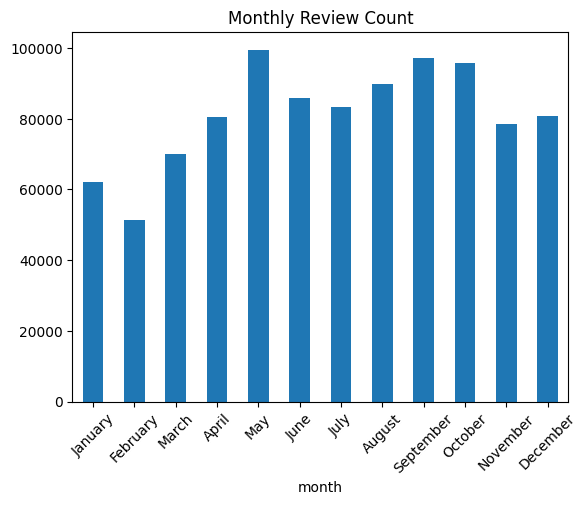

In [14]:

monthly_reviews.plot(kind='bar',title='Monthly Review Count')
plt.xticks(rotation=45)
plt.show()

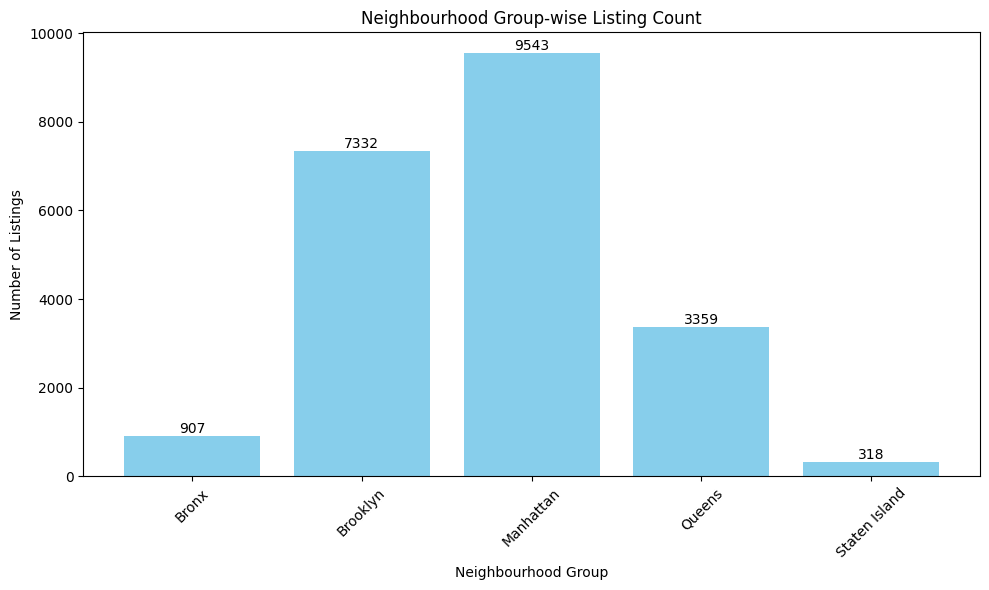

In [15]:
merged_df = df_listings.merge(df_neighbourhoods, on='neighbourhood', how='left')
# print(merged_df.columns)

grouped_data = merged_df.groupby('neighbourhood_group_x').size().reset_index(name='listing_count')
plt.figure(figsize=(10,6))
bars= plt.bar(grouped_data['neighbourhood_group_x'], grouped_data['listing_count'], color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height+5,str(height),ha='center',va='bottom',fontsize=10)
plt.title('Neighbourhood Group-wise Listing Count')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
room_count = df_listings.groupby('room_type')['listing_id'].count().sort_values(ascending=False).reset_index(name='listing_count')
print(room_count)


         room_type  listing_count
0  Entire home/apt          12287
1     Private room           8817
2       Hotel room            215
3      Shared room            140


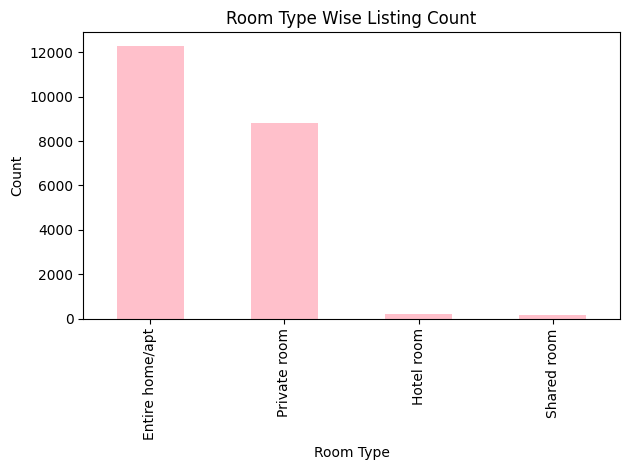

In [17]:
room_count = df_listings['room_type'].value_counts()
room_count.plot(kind='bar', color='pink')
plt.title('Room Type Wise Listing Count')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [18]:
avergae_minimum_nights = df_listings.groupby('room_type')['minimum_nights'].mean().reset_index()
print(avergae_minimum_nights)

         room_type  minimum_nights
0  Entire home/apt       29.067551
1       Hotel room        2.213953
2     Private room       25.765907
3      Shared room       33.350000


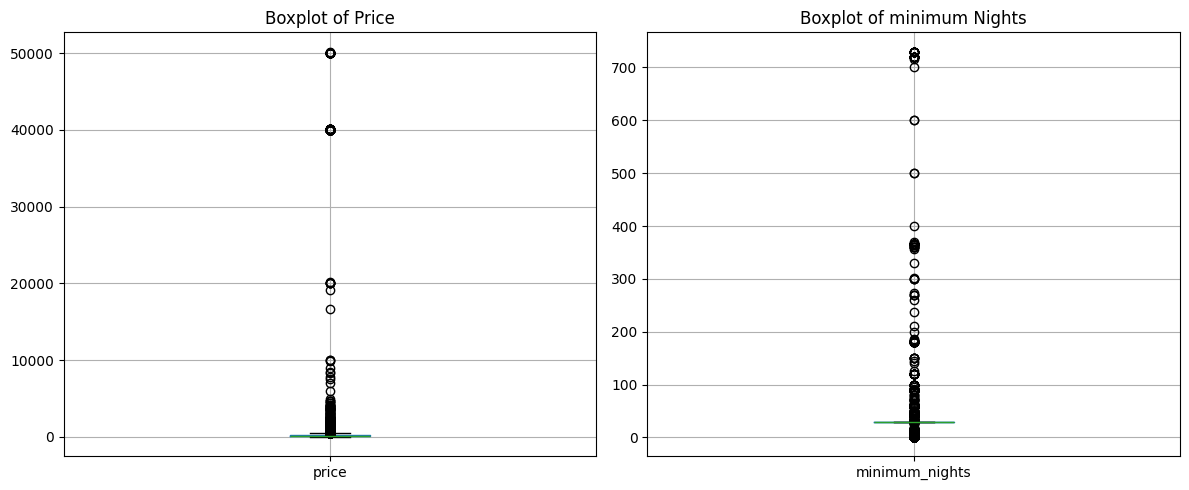

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df_listings.boxplot(column='price')
plt.title('Boxplot of Price')
plt.subplot(1,2,2)
df_listings.boxplot(column='minimum_nights')
plt.title('Boxplot of minimum Nights')
plt.tight_layout()
plt.show()

In [19]:
def remove_outliers_iqr(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    cleaned_df = df[(df[column]>=lower_bound) & (df[column] <=upper_bound)]
    print(f"{column}: Removed {df.shape[0] - cleaned_df.shape[0]} outliers")
    return cleaned_df
df_cleaned = remove_outliers_iqr(df_listings, 'price')
df_cleaned = remove_outliers_iqr(df_cleaned, 'minimum_nights')


price: Removed 1529 outliers
minimum_nights: Removed 4924 outliers


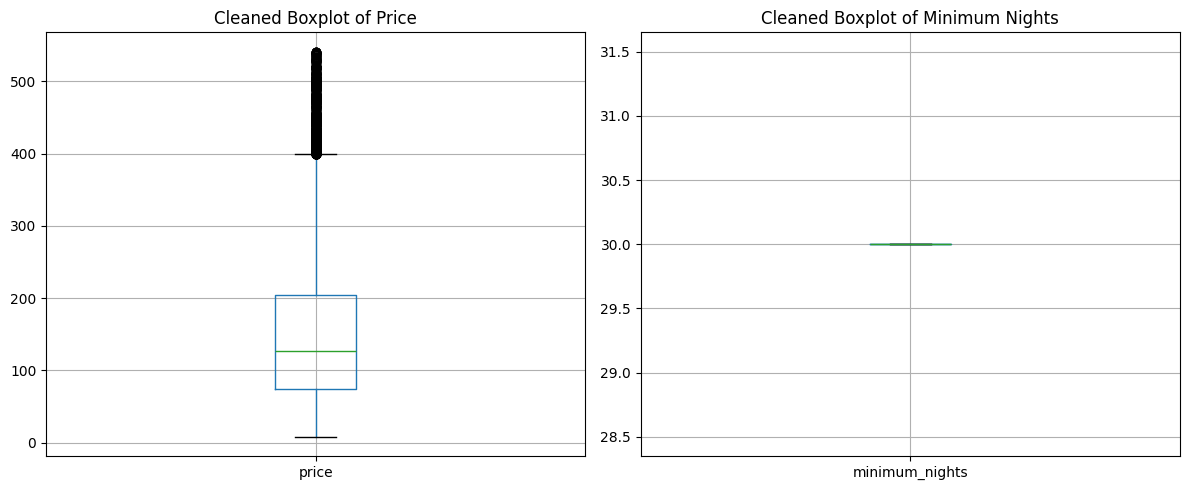

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_cleaned.boxplot(column='price')
plt.title('Cleaned Boxplot of Price')

plt.subplot(1, 2, 2)
df_cleaned.boxplot(column='minimum_nights')
plt.title('Cleaned Boxplot of Minimum Nights')

plt.tight_layout()
plt.show()


In [23]:
# df_listings.describe()
df_cleaned.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,review_score,host_listing_count,Total_price
count,1.500600e+04,1.500600e+04,15006.000000,15006.000000,15006.000000,15006.0,15006.000000,15006.000000,15006.000000,10507.000000,15006.000000,15006.000000
mean,5.840560e+17,1.953004e+08,40.727533,-73.939927,155.298014,30.0,26.451353,0.422238,252.644342,4.725673,46.040784,4658.940424
std,5.312594e+17,1.976614e+08,0.062243,0.060643,104.283985,0.0,56.075008,0.658676,104.240527,0.475012,119.530003,3128.519537
min,2.539000e+03,1.678000e+03,40.504560,-74.251907,8.000000,30.0,0.000000,0.000000,0.000000,1.000000,1.000000,240.000000
25%,3.909203e+07,2.138033e+07,40.683871,-73.978660,74.000000,30.0,0.000000,0.000000,177.000000,4.670000,1.000000,2220.000000
50%,6.960982e+17,1.150837e+08,40.723550,-73.949704,127.000000,30.0,4.000000,0.160000,281.000000,4.860000,2.000000,3810.000000
75%,1.062168e+18,3.880041e+08,40.765464,-73.918096,204.000000,30.0,24.000000,0.530000,349.000000,5.000000,15.000000,6120.000000
max,1.444534e+18,7.005911e+08,40.905490,-73.711822,541.000000,30.0,713.000000,6.870000,365.000000,5.000000,1054.000000,16230.000000


In [24]:
df_cleaned.to_csv('Nyc_Airbnb_2019_clean.csv', index=False)

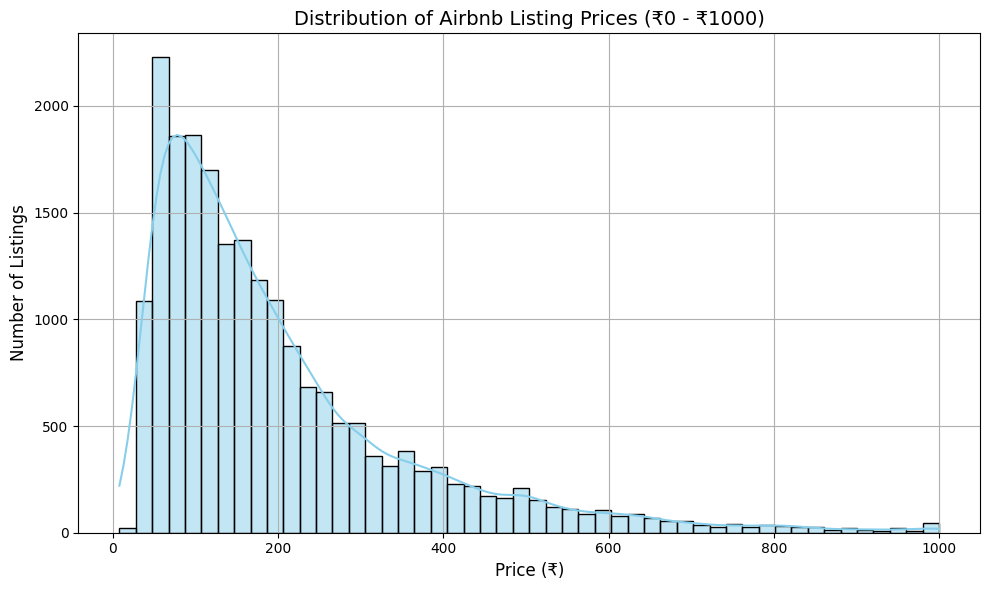

In [31]:
filtered_df = df_listings[df_listings['price'] <= 1000]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['price'], bins=50, kde=True, color='skyblue')  

plt.title('Distribution of Airbnb Listing Prices (₹0 - ₹1000)', fontsize=14)
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

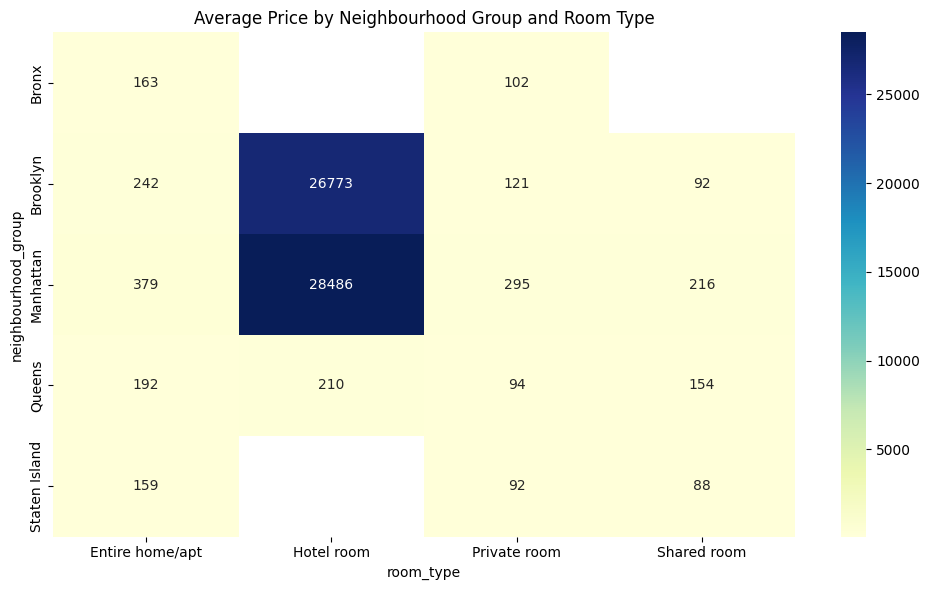

In [32]:
pivot_table = df_listings.pivot_table(
    index='neighbourhood_group', 
    columns='room_type', 
    values='price', 
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by Neighbourhood Group and Room Type")
plt.tight_layout()
plt.show()
